In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import os
from sklearn.preprocessing import minmax_scale
import seaborn as sns; sns.set_theme()
from collections import defaultdict
import functions

In [2]:
os.chdir('../../')

In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# GWO

In [10]:
print(os.getcwd())
dimension = 50
func='Rastrigin'
simu_id = 8
#func='Rosenbrock'
#simu_id = 29
intype = 'euclidian'
algo= 'GWO'
agents = 100
evaluations = 100000

/home/rcls/codigos/git-projects/interaction-network-examples


In [11]:
folder = f'analysis_interaction_graph/{dimension}d/gwo_results/'
results_file = f"{algo}_{func}_intype_{intype}_improved_False_init_Uniform_it_1000_dim_{dimension}_swarm_{agents}_eval_{evaluations}_sim_{simu_id:02d}_interaction_graph.txt"
filename = folder + results_file
results = defaultdict(dict)
results_file_fit = f"{algo}_{func}_intype_{intype}_improved_False_init_Uniform_it_1000_dim_{dimension}_swarm_{agents}_eval_{evaluations}_sim_{simu_id:02d}_best_fitness_through_iterations.txt"

data = np.loadtxt(filename)
agents = len(data[0])
data_transformed = data.reshape(agents, agents)
fit = functions.readLastLine(folder + results_file_fit)
results['hist'] = {'data':data_transformed, 
                       'fname': os.path.splitext(results_file)[0],
                       'fit': fit,
                      }

## Histogram IN All

/home/rcls/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


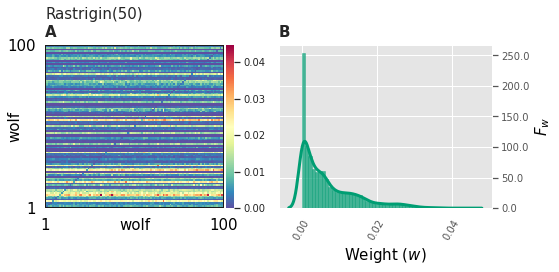

In [13]:
from matplotlib.ticker import FormatStrFormatter

histogram_folder=folder+"/nb-histogram-in/"
if not os.path.exists(histogram_folder):
    os.makedirs(histogram_folder)

label = ord('A')

plt.style.use('ggplot')
font_size_out = 10

fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(8,3))
fig.subplots_adjust(wspace=0.1, hspace=.2)

data = results["hist"]['data']
fname = results["hist"]['fname'] + ".png"
fit =  results["hist"]['fit'] 
normalized_data = data / np.sqrt((np.sum(data**2))) # https://paulrohan.medium.com/euclidean-distance-and-normalization-of-a-vector-76f7a97abd9

title = f"Simulation #{simu_id}\nMean: {data.mean()} - STD: {data.std()}\nFunc: {func}\nFitness: {fit}"
row = 0
my_y = 1.16
my_x = 0

ax[row].text(my_x,my_y,f"{func}({dimension})",fontsize=font_size_out*1.5,transform=ax[row].transAxes)



my_y = 1.05

ax[row].text(my_x,my_y,f"{chr(label)}",fontsize=font_size_out*1.5,transform=ax[row].transAxes,weight="bold")
sns.set(font_scale=1.2)
sns.heatmap(normalized_data, cmap="Spectral_r", \
            xticklabels=False, yticklabels=False, ax=ax[row],\
            cbar=True, vmin=0, cbar_kws={"pad": 0.01})

cbar = ax[row].collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=font_size_out)

#ax[row].invert_yaxis()
ax[row].set_xticks([0,len(normalized_data[0])])
ax[row].set_yticks([0,len(normalized_data[0])])
ax[row].set_xticklabels(["1",str(len(normalized_data[0]))])
ax[row].set_yticklabels(["1",str(len(normalized_data[0]))])
ax[row].tick_params('x', colors="black", labelsize=font_size_out*1.5)
ax[row].tick_params('y', colors="black", labelsize=font_size_out*1.5)
ax[row].set_xlabel("wolf",fontsize=font_size_out*1.5, color='black', labelpad=-15)
ax[row].set_ylabel("wolf",fontsize=font_size_out*1.5, color='black', labelpad=-15)    
ax[row].invert_yaxis()

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=font_size_out*1)


ax[row].axhline(y = 0, color = 'k', 
        linewidth = 2)

ax[row].axhline(y = agents, color = 'k',
            linewidth = 2)

ax[row].axvline(x = 0, color = 'k',
            linewidth = 2)

ax[row].axvline(x = agents, color = 'k',
            linewidth = 2)

######## DISTRIBUTION
label += 1

#sns.despine()    
row = 1
fmt = FormatStrFormatter("%.2f")
plt.style.use('seaborn-whitegrid')

my_x = 0
my_y = 1.05

ax[row].text(my_x,my_y,f"{chr(label)}",fontsize=font_size_out*1.5,transform=ax[row].transAxes,weight="bold")
sns.set(font_scale=1.2)


sns.distplot(np.hstack(normalized_data), color="#009E73",\
             bins=50, hist=True, label="simulation", kde_kws={"lw": 3},\
             hist_kws={"edgecolor": "#009E73","linewidth": 0.5, "alpha": 0.7},ax=ax[row])
ax[row].set_xlabel("Weight ($w$)",fontsize=font_size_out*1.5, color='black')
ax[row].set_ylabel("$F_w$",fontsize=font_size_out*1.5, color='black')    
ax[row].set_yticklabels(ax[row].get_yticks(), size = font_size_out*1)
ax[row].set_xticklabels(ax[row].get_xticks(), size = font_size_out*1)
ax[row].set_xticklabels(ax[row].get_xticklabels(), rotation=60)
ax[row].xaxis.set_major_formatter(fmt)
ax[row].yaxis.set_label_position("right")
ax[row].yaxis.tick_right()

#fig.subplots_adjust(wspace=0.27)
#fig.tight_layout()
#plt.savefig(histogram_folder+fname, bbox_inches='tight')
#plt.close()

## Histogram IN Hub

/home/rcls/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


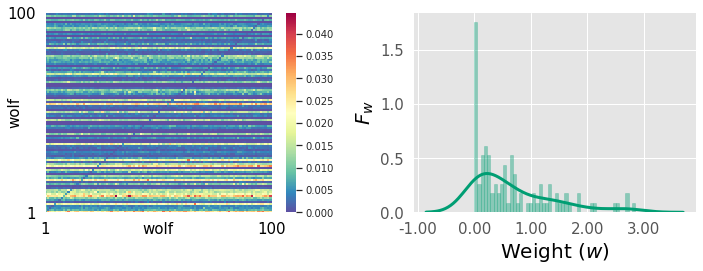

In [14]:
histogram_folder=folder+"/nb-histogram-hub/"
if not os.path.exists(histogram_folder):
    os.makedirs(histogram_folder)


plt.style.use('ggplot')
font_size_out = 10

fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(10,4))
data = results["hist"]['data']
fname = results["hist"]['fname'] + "_hub.png"
fit =  results["hist"]['fit']  
normalized_data = data / np.sqrt((np.sum(data**2))) # https://paulrohan.medium.com/euclidean-distance-and-normalization-of-a-vector-76f7a97abd9

title = f"Simulation #{simu_id}\nMean: {data.mean()} - STD: {data.std()}\nFunc: {func}\nFitness: {fit}"
row = 0
my_x = -0.2
my_y = 1.1

#ax[row].text(my_x,my_y,title,fontsize=1.5*font_size_out,transform=ax[row].transAxes,\
#                bbox=dict(edgecolor='none', facecolor='w', alpha=0.5))
sns.set(font_scale=1.2)
sns.heatmap(normalized_data, cmap="Spectral_r", \
            xticklabels=False, yticklabels=False, ax=ax[row],\
            cbar=True, vmin=0) #cbar_kws={'label': 'Weight'}

cbar = ax[row].collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=font_size_out)

#ax[row].invert_yaxis()
ax[row].set_xticks([0,len(normalized_data[0])])
ax[row].set_yticks([0,len(normalized_data[0])])
ax[row].set_xticklabels(["1", str(len(normalized_data[0]))])
ax[row].set_yticklabels(["1", str(len(normalized_data[0]))])
ax[row].tick_params('x', colors="black", labelsize=font_size_out*1.5)
ax[row].tick_params('y', colors="black", labelsize=font_size_out*1.5)
ax[row].set_xlabel("wolf",fontsize=font_size_out*1.5, color='black', labelpad = -15)
ax[row].set_ylabel("wolf",fontsize=font_size_out*1.5, color='black', labelpad = -15)    
ax[row].invert_yaxis()


sns.despine()    
row = 1
fmt = FormatStrFormatter("%.2f")
data_hub = normalized_data.sum(axis=1)
sns.distplot(data_hub, color="#009E73",\
             bins=50, hist=True, label="simulation", kde_kws={"lw": 3},\
             hist_kws={"edgecolor": "#009E73","linewidth": 0.5, "alpha": 0.4},ax=ax[row])
ax[row].set_xlabel("Weight ($w$)",fontsize=font_size_out*2, color='black')
ax[row].set_ylabel("$F_w$",fontsize=font_size_out+10, color='black')
ax[row].set_yticklabels(ax[row].get_yticks(), size = font_size_out*1.5)
ax[row].set_xticklabels(ax[row].get_xticks(), size = font_size_out*1.5)
ax[row].xaxis.set_major_formatter(fmt)

#fig.subplots_adjust(wspace=0.27)
fig.tight_layout()
plt.savefig(histogram_folder+fname, bbox_inches='tight')

In [36]:
data = results[0]['data']
print(data)
print(data.sum(axis=1))
#print(np.hstack(data))

[[3.1568e+04 6.0598e+04 2.8873e+04 5.4525e+04 3.0176e+04 2.7774e+04
  4.8692e+04 4.2092e+04 3.4873e+04 6.0185e+04 6.5232e+04 4.8531e+04
  4.5916e+04 4.9928e+04 3.2829e+04 3.4171e+04 6.7836e+04 4.2766e+04
  3.8191e+04 3.9585e+04 4.3614e+04 3.7719e+04 3.1103e+04 3.3671e+04
  5.4100e+04 4.2564e+04 4.0642e+04 5.9135e+04 3.6745e+04 3.9263e+04]
 [4.6071e+02 2.2273e+02 5.1080e+02 4.0548e+02 4.6684e+02 3.9517e+02
  6.8598e+02 4.1229e+02 4.2239e+02 3.3139e+02 4.0333e+02 4.6020e+02
  6.9289e+02 3.2659e+02 3.9590e+02 2.3648e+02 3.6833e+02 2.7984e+02
  3.7363e+02 5.2301e+02 4.7365e+02 5.1518e+02 3.6650e+02 4.0003e+02
  4.3969e+02 4.2020e+02 3.7385e+02 6.0325e+02 4.2521e+02 4.1099e+02]
 [2.3712e+02 1.8212e+02 1.1837e+02 1.5036e+02 1.5576e+02 1.5309e+02
  1.7746e+02 1.4827e+02 1.8900e+02 1.4686e+02 2.0143e+02 2.7619e+02
  1.5338e+02 1.6061e+02 2.1334e+02 2.0502e+02 1.4576e+02 3.2841e+02
  1.6458e+02 1.7815e+02 2.6469e+02 1.4963e+02 1.5370e+02 1.4933e+02
  1.5319e+02 1.4572e+02 1.4878e+02 1.7308e+02 